In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from math import log, exp

# make an ODE model with V + the two gates m and h:
def rhs(Y, t, i_app):
    
    V, m, h = Y

    C_m = 1.0; # uF/cm^2

    if t>1:
        i_app = 0;

    i_ion = i_K(V) + i_Na(V, m, h);
    
    dV = -(1/C_m)*(i_ion + i_app);
    dm = m_ode(m, t, V)
    dh = h_ode(h, t, V)    
        
    return [dV, dm, dh]



In [2]:
R = 8314 # mJ/(K mol)
T = 273.0+37.0 #  K
F = 96485.33289 # C/mol

K_o = 5.4;   #mM # try changing the K_o, check the effect on the solution
K_i = 145.0; #mM
E_K = (R*T/F)*log(K_o/K_i) # mV
g_K = 0.1; 


In [3]:
def i_K(V):

    i_K = g_K*(V-E_K);
    return i_K;



In [4]:
def m_gate(V):

    alpha_m = (15.0816 + 0.32*V)/(1 - 0.0089778037307*np.exp(-0.1*V))
    beta_m = 0.08*np.exp(-0.0909090909091*V)

    return alpha_m, beta_m

def m_ode(m, t, V):

    alpha_m, beta_m = m_gate(V)
    dm = alpha_m*(1-m) - m*beta_m;

    return dm;





In [5]:
def h_gate(V):
    
    if type(V)==np.ndarray:
        alpha_h = 0*V
        idx = np.nonzero(V<-40)
        alpha_h = 0*V
        alpha_h[idx] = 1.04951082543e-06*np.exp(-0.147058823529*V[idx])
        beta_h = (1.0/(0.13 + 0.0497581410839*np.exp(-0.0900900900901*V)));
        beta_h[idx] = 310000.0*np.exp(0.35*V[idx]) + 3.56*np.exp(0.079*V[idx])
    else:
        alpha_h = (0 if V >= -40 else 1.04951082543e-06*exp(-0.147058823529*V))
        beta_h = (1.0/(0.13 + 0.0497581410839*exp(-0.0900900900901*V)) if V >= -40 else 310000.0*exp(0.35*V) + 3.56*exp(0.079*V))
        
    return alpha_h, beta_h    


def h_ode(h, t, V):

    alpha_h, beta_h = h_gate(V)
    dh = alpha_h*(1-h) - h*beta_h;

    return dh;


In [6]:
Na_o = 140.0
Na_i = 18.0;
E_Na = (R*T/F)*log(Na_o/Na_i) # mV
g_Na = 10;

def i_Na(V, m, h):

    i_Na = g_Na*pow(m,3)*h*(V-E_Na);
    return i_Na;


In [7]:
Y0 = [E_K,0,1];

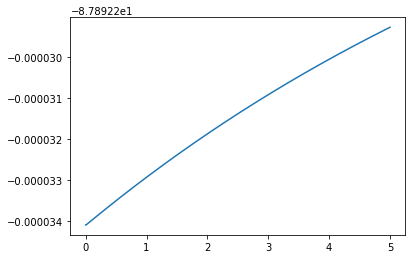

In [8]:
time = np.linspace(0,5,1001);
Y = odeint(rhs, Y0, time, (0,))
plt.plot(time,Y[:,0]); plt.show()


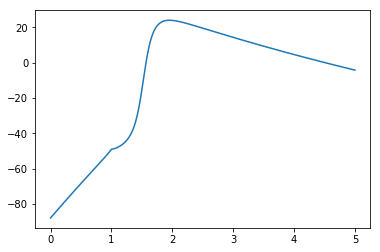

In [9]:
Y = odeint(rhs, Y0, time, (-40,));  plt.plot(time,Y[:,0]); plt.show()

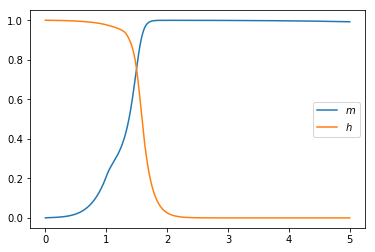

In [10]:
 plt.plot(time,Y[:,1:3]); plt.legend((r'$m$',r'$h$')); plt.show()

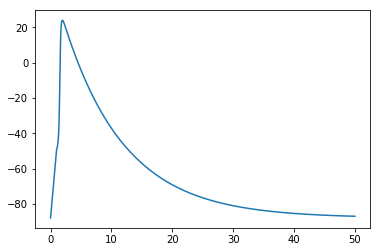

In [17]:
# simulating for a longer time, the potential goes back to around V = -85mV
time = np.linspace(0,50,1001);
Y = odeint(rhs, Y0, time, (-40,));  plt.plot(time,Y[:,0]); plt.show()

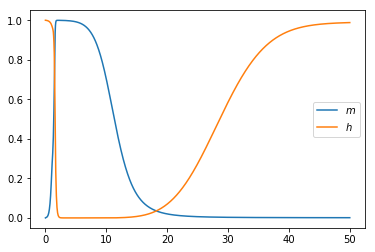

In [12]:
#The gates also goes back to inital states
plt.plot(time,Y[:,1:3]); plt.legend((r'$m$',r'$h$')); plt.show()

In [ ]:
# how can we make the action potential last longer?